In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import lag_plot
from prophet import Prophet
from sklearn.metrics import r2_score
import pickle

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HistoricalQuotes.csv', parse_dates = True)

In [ ]:
data.rename(columns = {' Close/Last' : 'Close', ' Volume' : 'Volume', ' Open' : 'Open', ' High' : 'High', ' Low' : 'Low'}, inplace = True)

In [ ]:
data.head()

,Date,Close,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [ ]:
def convert(x):
  y = x[2:]
  return float(y)

In [ ]:
data['Close'] = data['Close'].apply(convert)
data['Open'] = data['Open'].apply(convert)
data['High'] = data['High'].apply(convert)
data['Low'] = data['Low'].apply(convert)

In [ ]:
data.head()

,Date,Close,Volume,Open,High,Low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.10,286.00,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.50
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23


In [ ]:
data_corr = data.corr()

<ipython-input-8-09b271be5fbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr()


<Axes: >

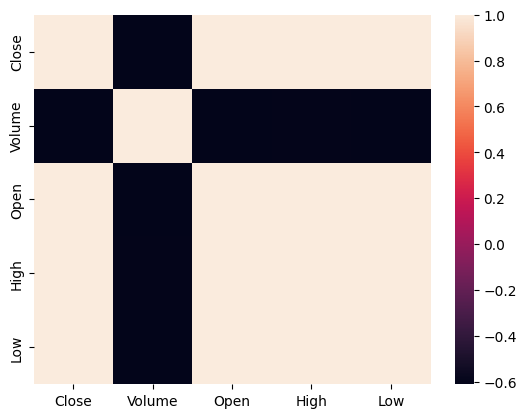

In [ ]:
sns.heatmap(data_corr)

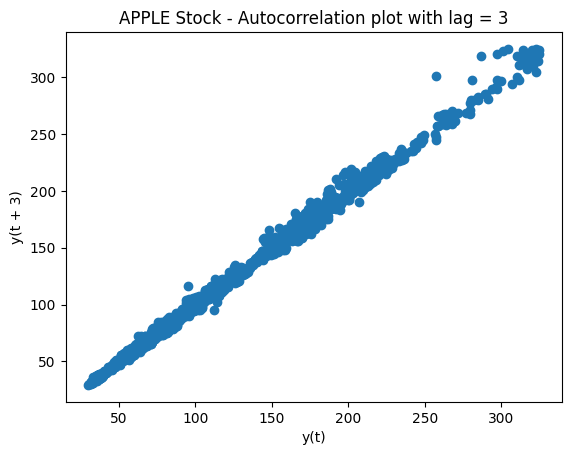

In [ ]:
plt.figure()
lag_plot(data['Open'], lag=3)
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.show()

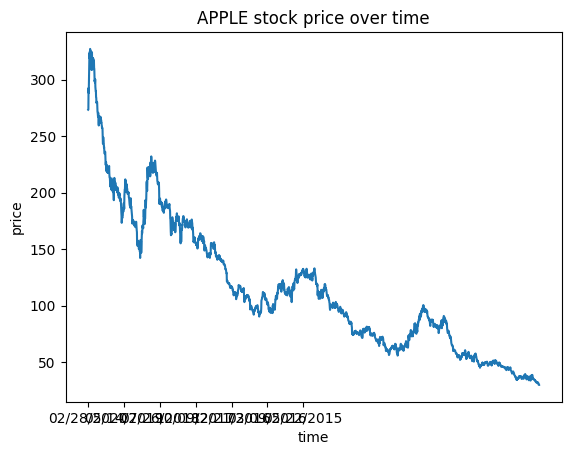

In [ ]:
plt.plot(data["Date"], data["Close"])
plt.xticks(np.arange(0,1259, 200), data['Date'][0:1259:200])
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
lens = data.shape[0]
end = int(0.8 * lens)
end

2014

In [ ]:
train = data.iloc[:end]
test = data.iloc[end:]

In [ ]:
train

,Date,Close,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2009,03/05/2012,76.1657,201797181,77.9171,78.2114,75.1428
2010,03/02/2012,77.8828,107544392,77.7485,78.1143,77.5028
2011,03/01/2012,77.7814,170563731,78.3100,78.3157,76.9671
2012,02/29/2012,77.4914,237448891,77.3657,78.2300,76.5285


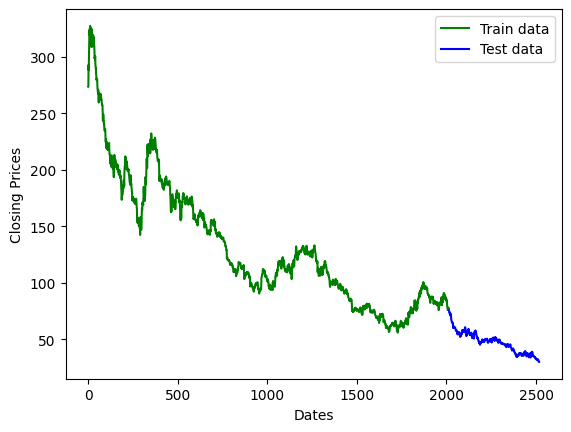

In [ ]:
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train['Close'], 'green', label='Train data')
plt.plot(test['Close'], 'blue', label='Test data')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def stationarity(col):
    res = adfuller(col.dropna())
    print("Test Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [ ]:
stationarity(data['Close'])

Test Statistic: -3.3269374370469524
P-Value: 0.013716478594487318
Stationary


In [ ]:
data['First_Order_Difference'] = data['Close'] - data['Close'].shift(1)
data['Second_Order_Difference'] = data['First_Order_Difference'] - data['First_Order_Difference'].shift(1)

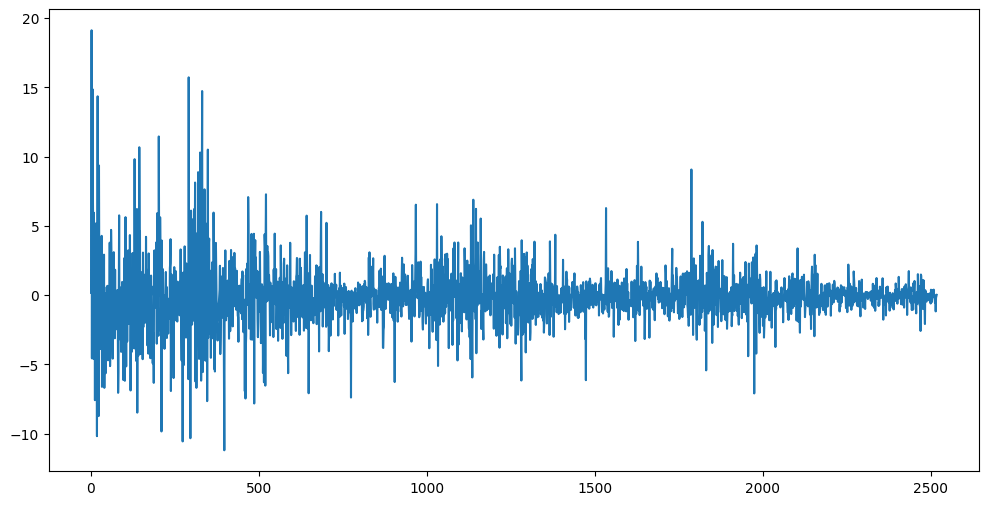

In [ ]:
data['First_Order_Difference'].plot(figsize=(12, 6))
plt.show()

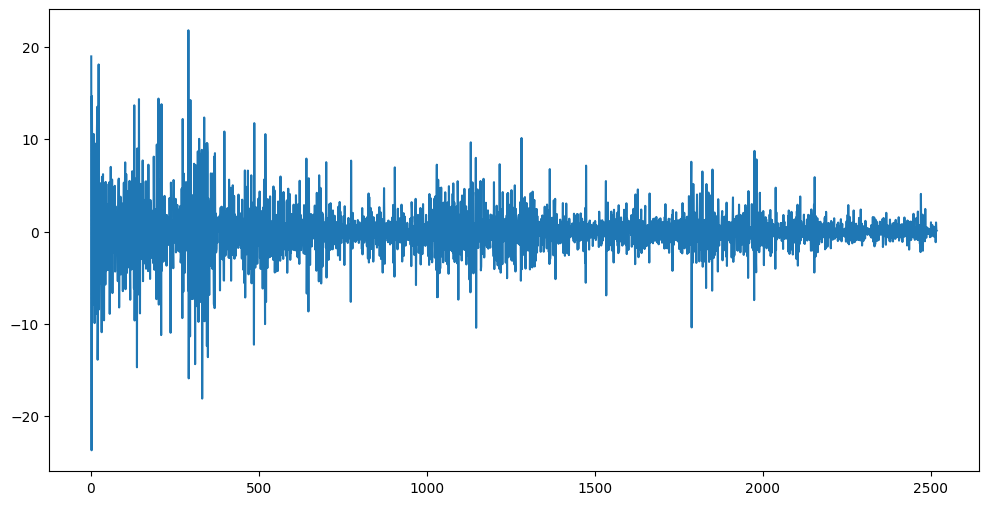

In [ ]:
data['Second_Order_Difference'].plot(figsize=(12, 6))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


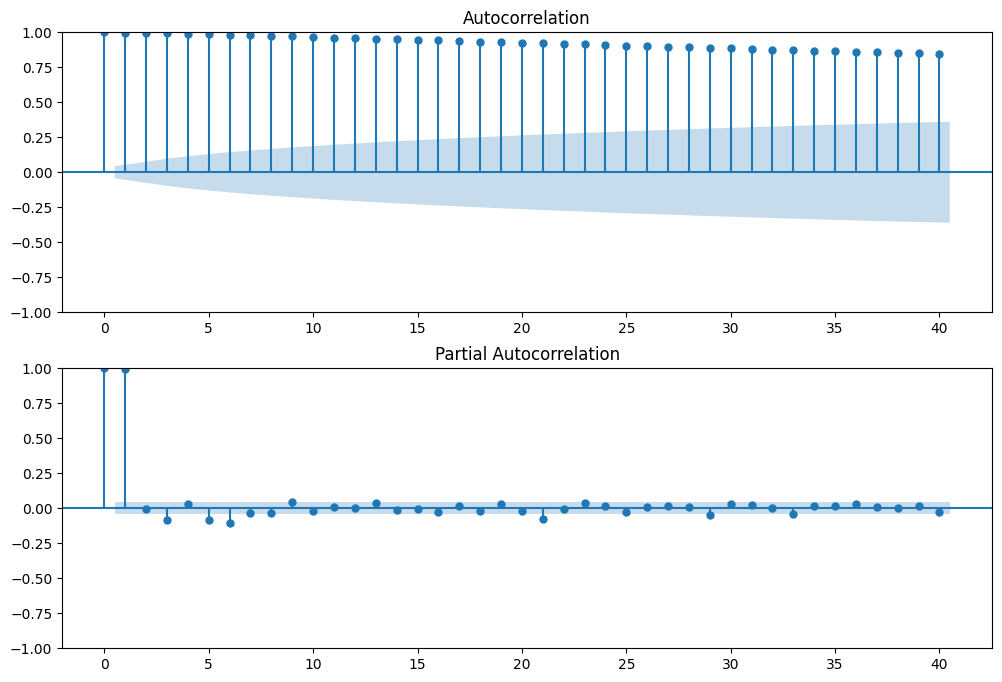

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'], lags=40, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Close'], lags=40, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['Close'], order=(5, 1, 0))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2014
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4534.200
Date:                Wed, 24 May 2023   AIC                           9080.399
Time:                        05:58:55   BIC                           9114.044
Sample:                             0   HQIC                          9092.749
                               - 2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0165      0.014      1.166      0.243      -0.011       0.044
ar.L2         -0.0374      0.013     -2.912      0.004      -0.063      -0.012
ar.L3         -0.0199      0.012     -1.623      0.1

In [ ]:
pred = model.forecast(steps=len(test))

In [ ]:
history = [x for x in train['Close']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test['Close'][t + 2014]
    history.append(obs)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(predictions, test['Close'])

0.9927662766722549

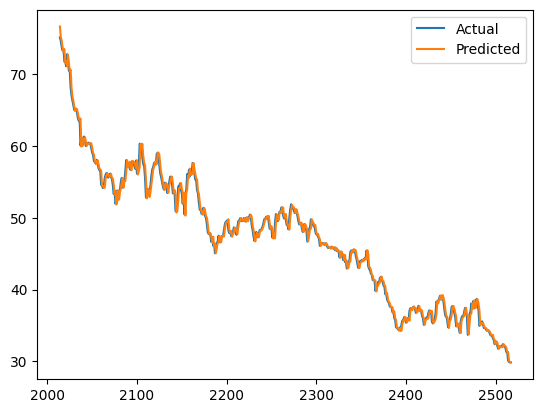

In [ ]:
plt.plot(test['Close'], label="Actual")
plt.plot(test.index, predictions, label="Predicted")
plt.legend()

In [ ]:
filename = 'model_pickle_apple_arima.sav'
pickle.dump(model, open(filename, 'wb'))

#Forecast

In [ ]:
history = [x for x in data['Close']]
forecast = []
for t in range(50):
    model = ARIMA(history, order=(5, 1, 0))
    model = model.fit()
    output = model.forecast()
    pred = output[0]
    forecast.append(pred)
    obs = round(pred, 2)
    history.append(obs)

In [ ]:
forecast

[29.770759739044287,
 29.703623261822695,
 29.68744572223413,
 29.692550234910925,
 29.68604937508696,
 29.68113061817711,
 29.676054367752645,
 29.67990048019274,
 29.6802116704234,
 29.67922764078547,
 29.679571229480448,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68,
 29.68]

In [ ]:
newindex = [i for i in range(test.index[-1], test.index[-1] + 50)]

In [ ]:
test.index[-1]

2517

ValueError: ignored

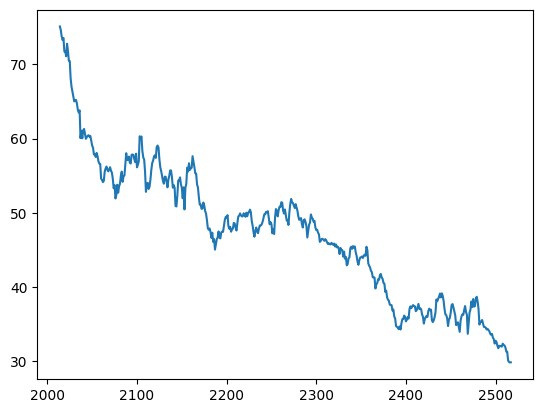

In [ ]:
plt.plot(test['Close'], label="Actual")
plt.plot(newindex, forecast, label="Forecasted")
plt.legend()